In [1]:
import pandas as pd
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Change default size of plots
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

In [2]:
filename = 'MyData/data1603490484.pkl' # Insert your file generated with the GenerateData notebook
df = pd.read_pickle(filename)
count = len(df)
days = (df.datetime.max() - df.datetime.min()).days

In [3]:
# Per day stats
print(f"Average of {df['msPlayed'].sum()/60000/days} minutes per day")
print(f"Average of {df['artistName'].nunique()/days} new artists per day")
print(f"Average of {df['trackName'].nunique()/days} new tracks per day")

Average of 109.18058046875001 minutes per day
Average of 2.8515625 new artists per day
Average of 12.520833333333334 new tracks per day


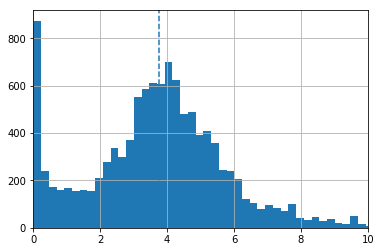

In [4]:
# Distribution of duration of plays in minutes
(df.msPlayed/60000).hist(bins=150)
plt.xlim([0,10])
plt.axvline(float((df.msPlayed/60000).mean()), linestyle='dashed')

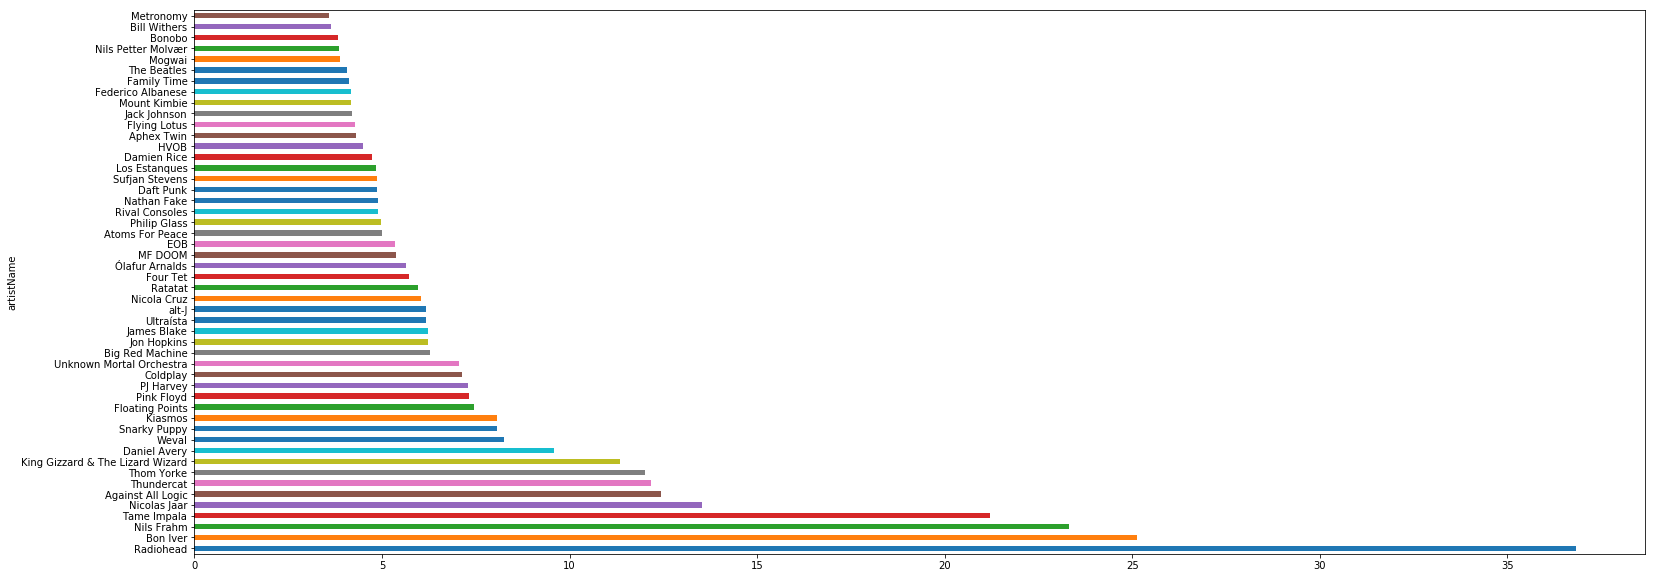

In [5]:
# Artists with more hours
artists_df = df.groupby(['artistName']).sum()
artists_df['timeSpentHrs'] = artists_df.msPlayed/3600000
artists_df.drop('msPlayed', axis='columns', inplace=True)
artists_df.sort_values('timeSpentHrs',ascending = False).head(50)['timeSpentHrs'].plot(kind='barh', figsize=(26, 10))

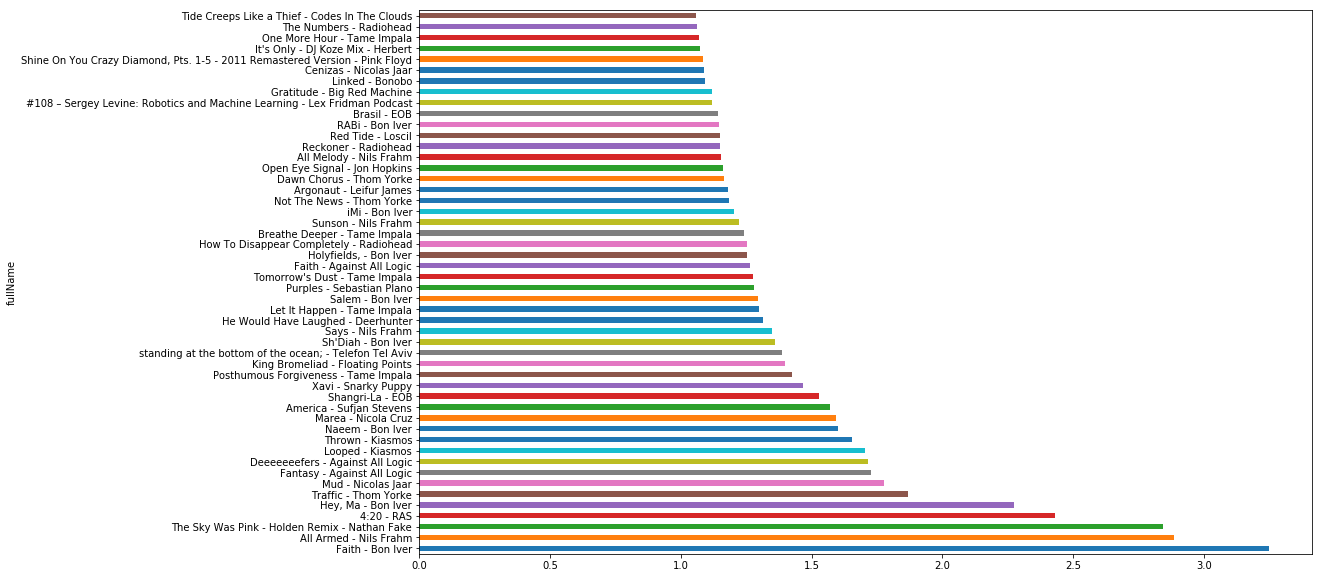

In [6]:
# Tracks with more hours
tracks_df = df.groupby(['fullName']).sum()
tracks_df['timeSpentHrs'] = tracks_df.msPlayed/3600000
tracks_df.drop('msPlayed', axis='columns', inplace=True)
tracks_df.sort_values('timeSpentHrs',ascending = False).head(50)['timeSpentHrs'].plot(kind='barh', figsize=(16, 10))

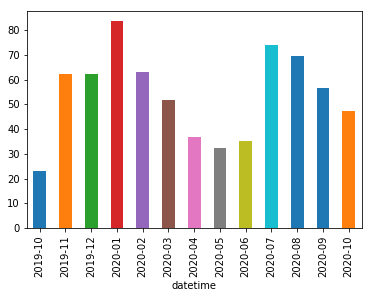

In [7]:
# Hours by month
df_by_month = df.groupby(df["datetime"].dt.to_period('M')).sum()
(df_by_month.msPlayed/3600000).plot(kind="bar")

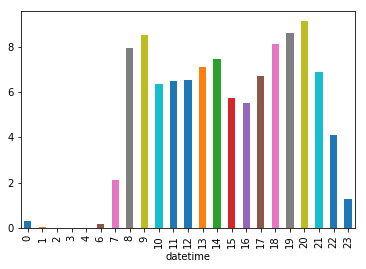

In [8]:
# Minutes by time of day
df_by_hour = df.groupby(df["datetime"].dt.hour).sum()
(df_by_hour.msPlayed/60000/days).plot(kind="bar")

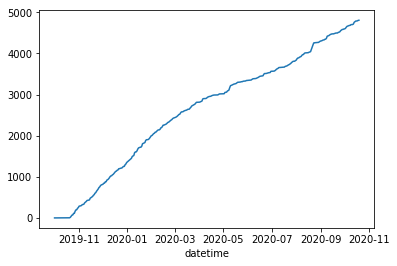

In [9]:
# New tracks vs date
tmp = df.groupby(df['trackName']).min()
tmp = tmp.groupby(tmp['datetime'].dt.date).count()
tmp['datetime'].cumsum().plot()

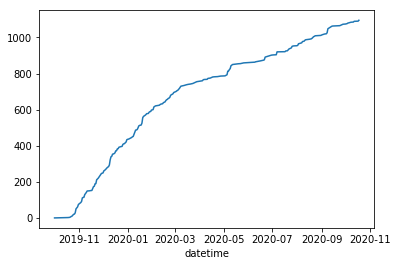

In [10]:
# New artists vs date
tmp = df.groupby(df['artistName']).min()
tmp = tmp.groupby(tmp['datetime'].dt.date).count()
tmp['datetime'].cumsum().plot()

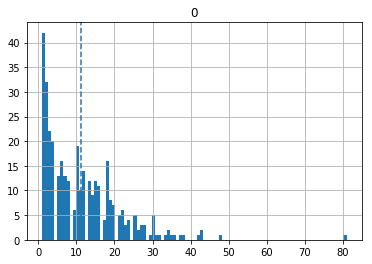

In [11]:
# Unique artsts each day histogram
tmp = df.groupby(df["datetime"].dt.to_period('D'))
unique_artists = pd.DataFrame([tmp.get_group(x)['artistName'].nunique() for x in tmp.groups],
                              index=tmp.groups.keys())
unique_artists.hist(bins=100)
plt.axvline(float(unique_artists.mean()), linestyle='dashed')

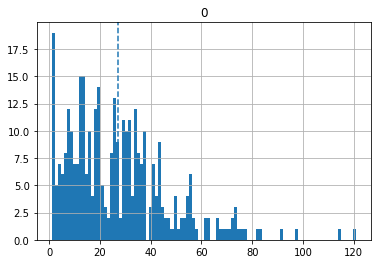

In [12]:
# Unique songs each day histogram
tmp = df.groupby(df["datetime"].dt.to_period('D'))
unique_tracks = pd.DataFrame([tmp.get_group(x)['trackName'].nunique() for x in tmp.groups],
                              index=tmp.groups.keys())
unique_tracks.hist(bins=100)
plt.axvline(float(unique_tracks.mean()), linestyle='dashed')

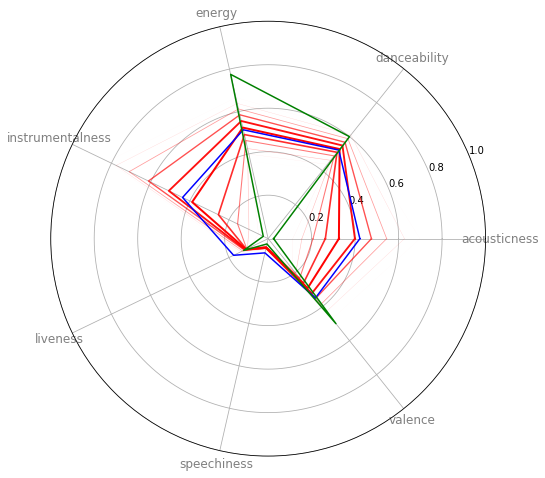

In [49]:
mu = 0.5
sigma = 0.08
def gaussian(mu, sigma, x):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))
spider_df = df[['acousticness',
                'danceability',
                'energy',
                'instrumentalness',
                'liveness',
                'speechiness',
                'valence']]
ncols = len(spider_df.columns)
angles = [2 * math.pi * n / ncols for n in range(ncols)]
plt.xticks(angles, spider_df.columns, color='grey', size=12)
plt.ylim(0, 1)
angles.append(2 * math.pi)

for p in np.arange(0.01, 0.99, 0.04):
    values =list(spider_df.quantile(q=p))
    values.append(values[0])
    alpha = gaussian(mu, sigma, p)
    ax.plot(angles, values, linewidth=alpha*2, linestyle='solid', color='r', alpha=alpha)
    
mean = list(spider_df.mean())
mean.append(mean[0])
ax.plot(angles, mean, linestyle='solid', color='b')
WORLD_AVERAGE = [0.025, 0.6, 0.775, 0.025, 0.125, 0.025, 0.5, 0.025]
ax.plot(angles, WORLD_AVERAGE, linestyle='solid', color='g')